# Masks generation

The porpuses of this notebook is to show how to generate ocean masks for different regions. It uses functions genBasinMasks.

In [1]:
from mom6_tools.m6plot import xyplot
from mom6_tools.m6toolbox import genBasinMasks 
from mom6_tools.MOM6grid import MOM6grid
from mom6_tools.DiagsCase import DiagsCase
import yaml
import numpy 
import xarray as xr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Basemap module not found. Some regional plots may not function properly


In [2]:
# Read in the yaml file
diag_config_yml_path = "diag_config.yml"
diag_config_yml = yaml.load(open(diag_config_yml_path,'r'), Loader=yaml.Loader)

In [3]:
# Create the case instance
dcase = DiagsCase(diag_config_yml['Case'])
RUNDIR = dcase.get_value('RUNDIR')
print('Run directory is:', RUNDIR)
print('Casename is:', dcase.casename)

Run directory is: /glade/scratch/gmarques/g.c2b6.GJRA.TL319_t061.long_JRA_mct.076/run
Casename is: g.c2b6.GJRA.TL319_t061.long_JRA_mct.076


In [4]:
stream = True
# Load mom6 grid
grd = dcase.grid
depth = grd.depth_ocean
# remote Nan's, otherwise genBasinMasks won't work
depth[numpy.isnan(depth)] = 0.0

MOM6 grid successfully loaded... 



### Create masks for different regions

In [5]:
basin_code = genBasinMasks(grd.geolon, grd.geolat, depth)

11.16427964664149 64.78854837178643 [391, 434]


### Check code number for each region defined

In [6]:
vals = numpy.unique(basin_code)

<Figure size 864x576 with 0 Axes>

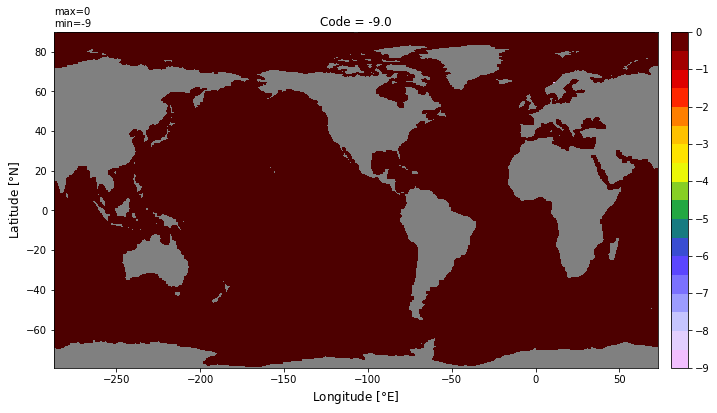

<Figure size 864x576 with 0 Axes>

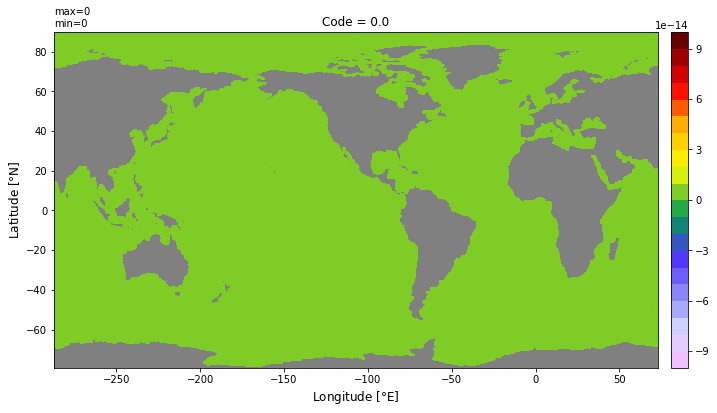

<Figure size 864x576 with 0 Axes>

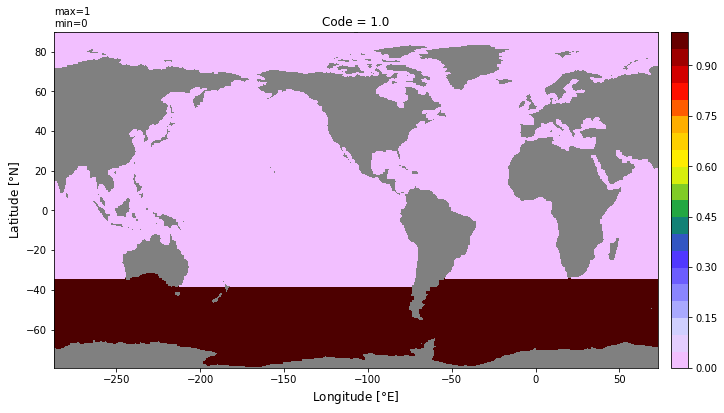

<Figure size 864x576 with 0 Axes>

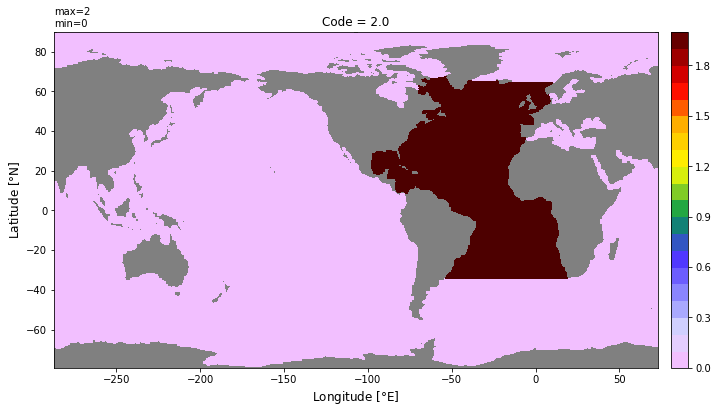

<Figure size 864x576 with 0 Axes>

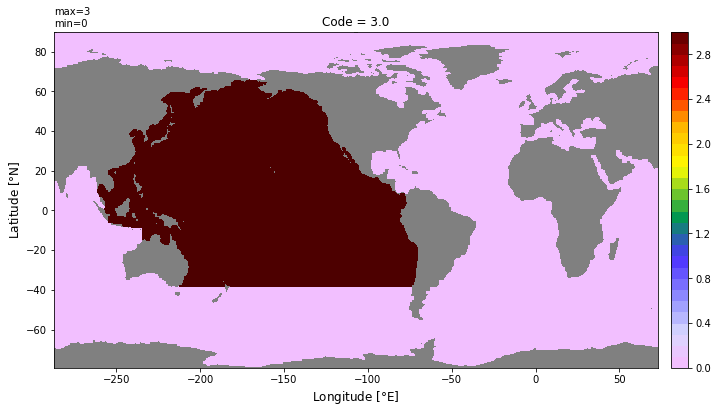

<Figure size 864x576 with 0 Axes>

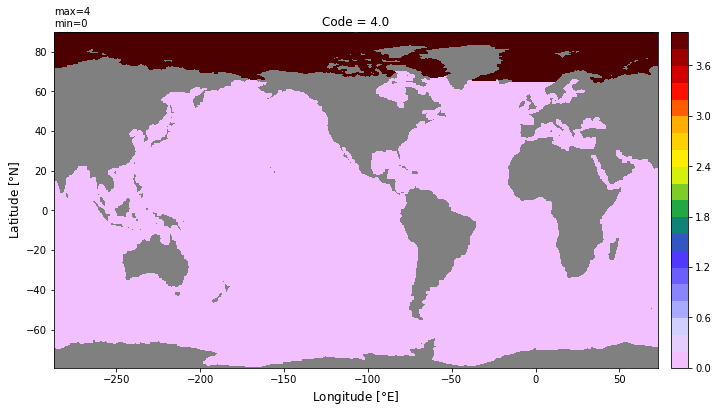

<Figure size 864x576 with 0 Axes>

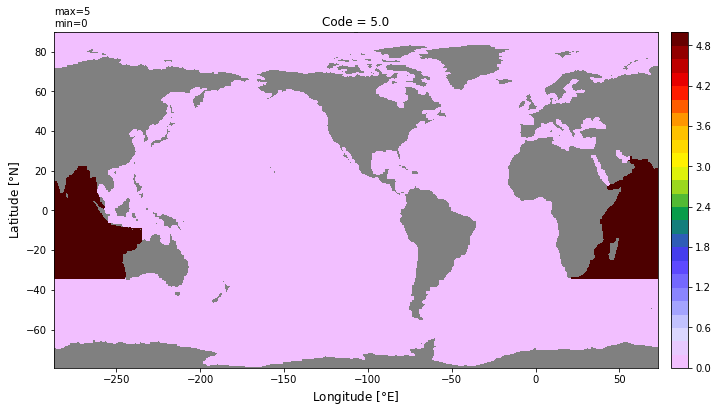

<Figure size 864x576 with 0 Axes>

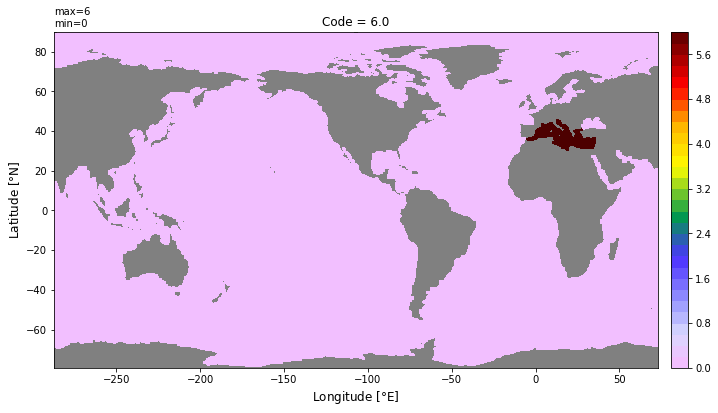

<Figure size 864x576 with 0 Axes>

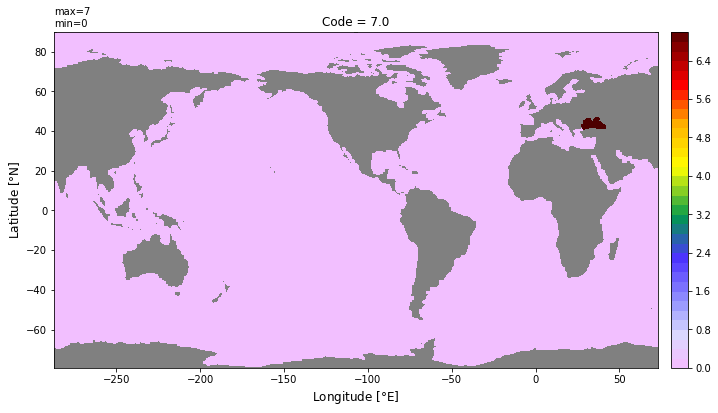

<Figure size 864x576 with 0 Axes>

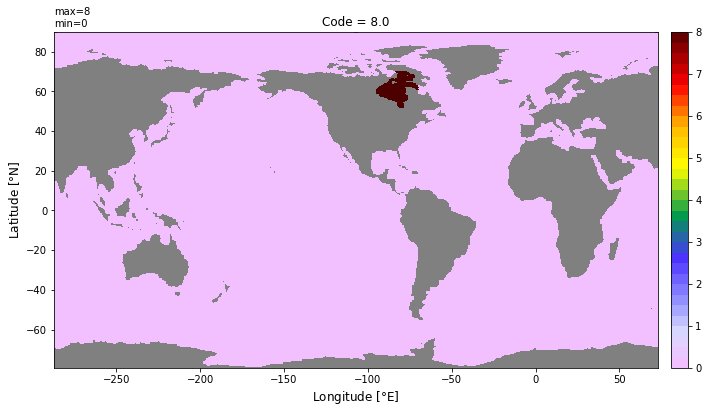

<Figure size 864x576 with 0 Axes>

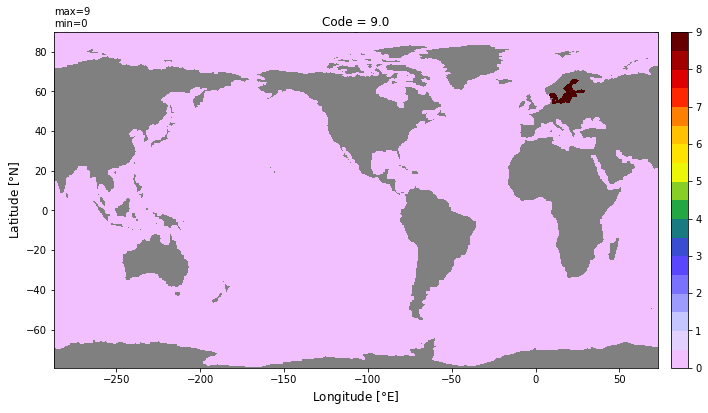

<Figure size 864x576 with 0 Axes>

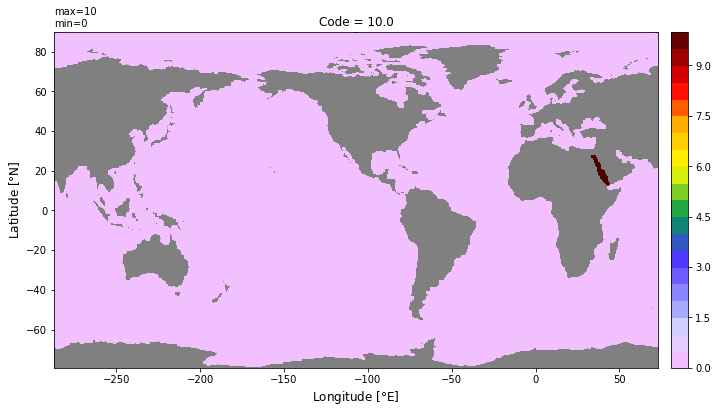

<Figure size 864x576 with 0 Axes>

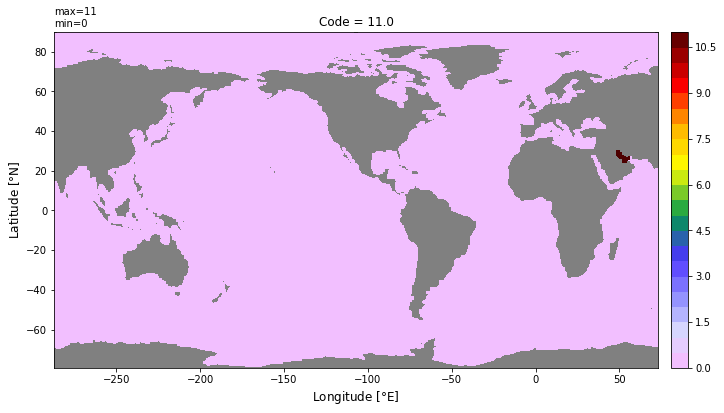

In [7]:
for v in vals:
    dummy = numpy.zeros(basin_code.shape)
    dummy[basin_code == v] = v
    dummy = numpy.ma.masked_where(depth == 0., dummy)
    plt.figure(figsize=(12,8))
    xyplot(dummy, grd.geolon, grd.geolat,title='Code = '+str(v))


In [8]:
# reload codes as dataarray
basin_code = genBasinMasks(grd.geolon, grd.geolat, depth, xda=True)

11.16427964664149 64.78854837178643 [391, 434]


Noticed that point [391, 434] does not belong to any of the masks generated. This is okay but let see where this point is located:

<Figure size 864x576 with 0 Axes>

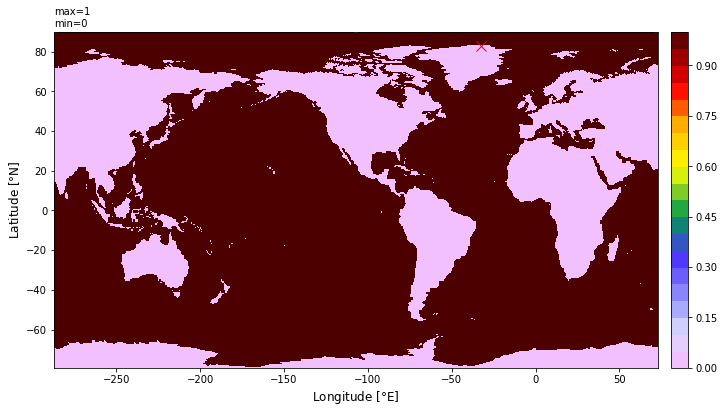

In [9]:
plt.figure(figsize=(12,8))
xyplot(basin_code[0,:].values, grd.geolon, grd.geolat)
plt.plot(grd.geolon[434,391], grd.geolat[434,391],'xr', ms=10); 

### Now, let's plot the masking for all the regions:

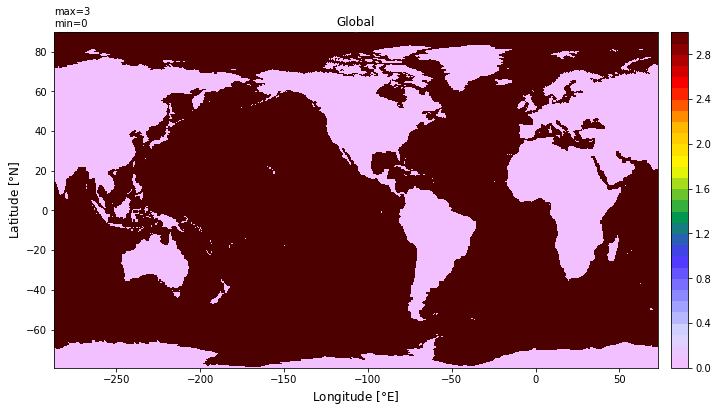

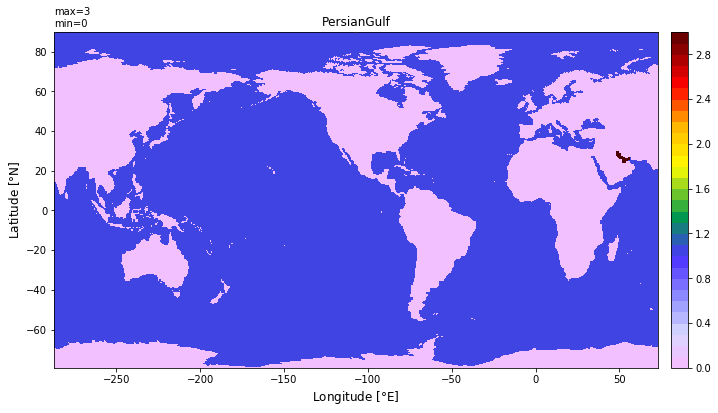

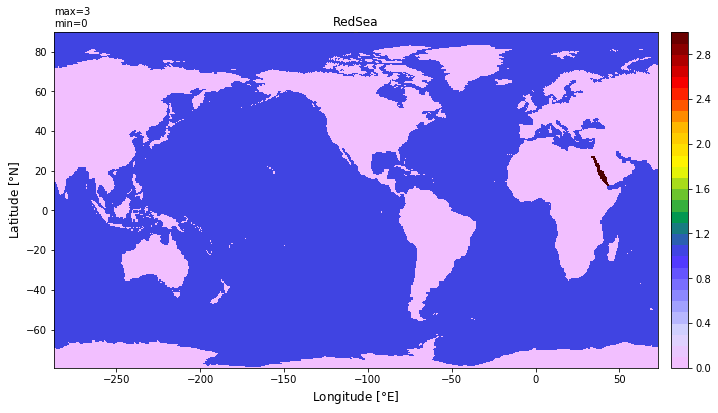

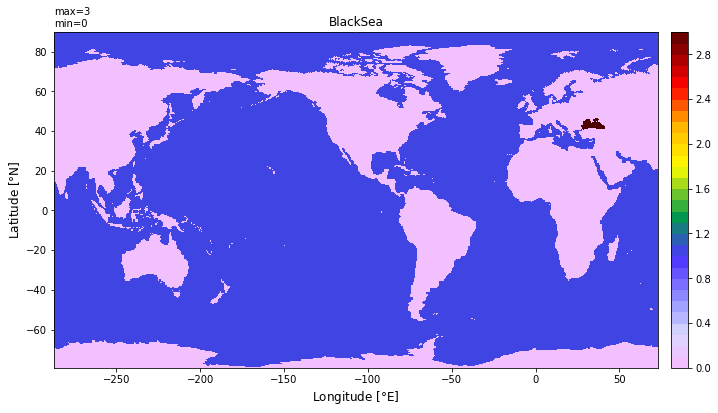

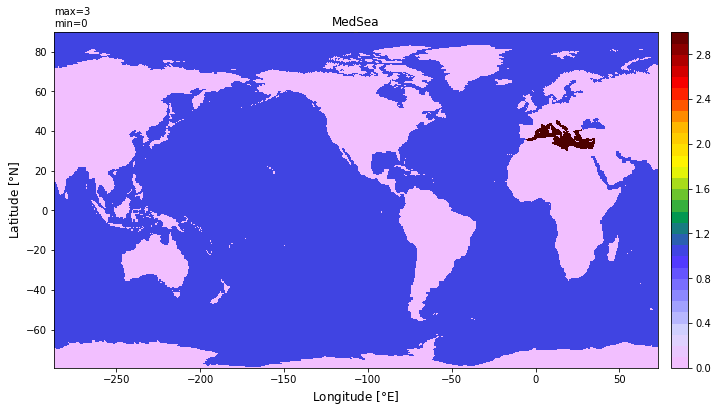

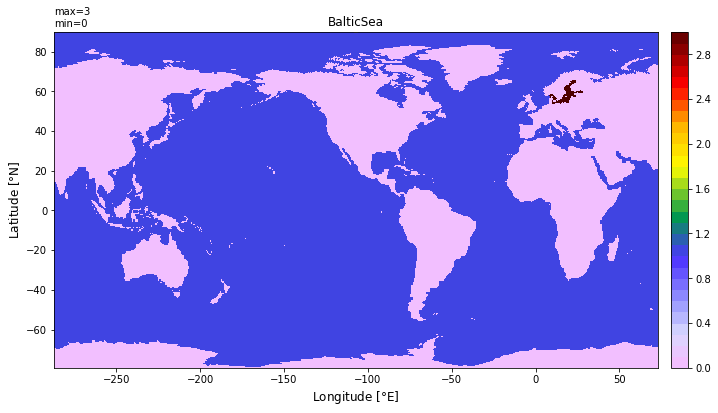

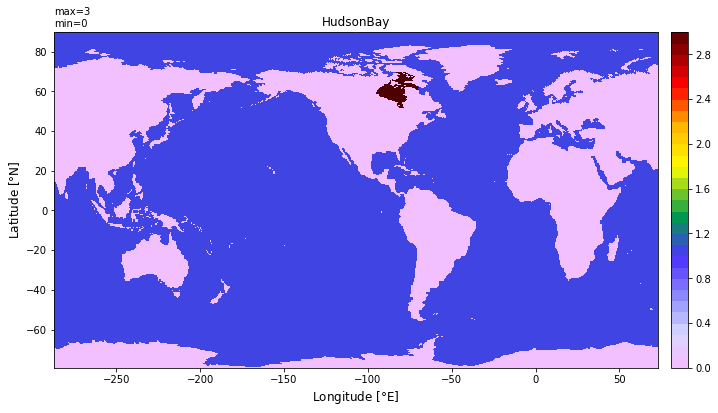

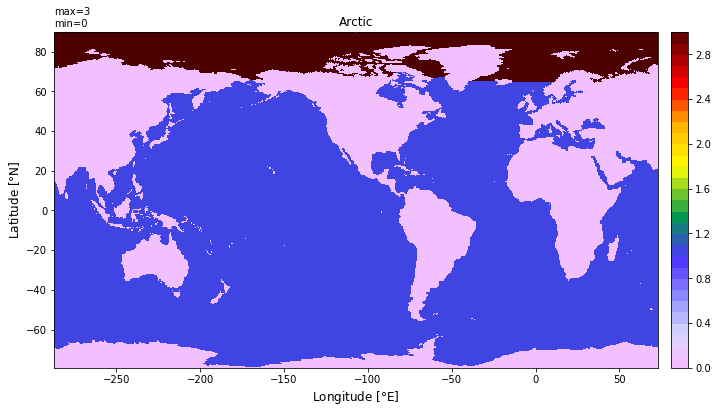

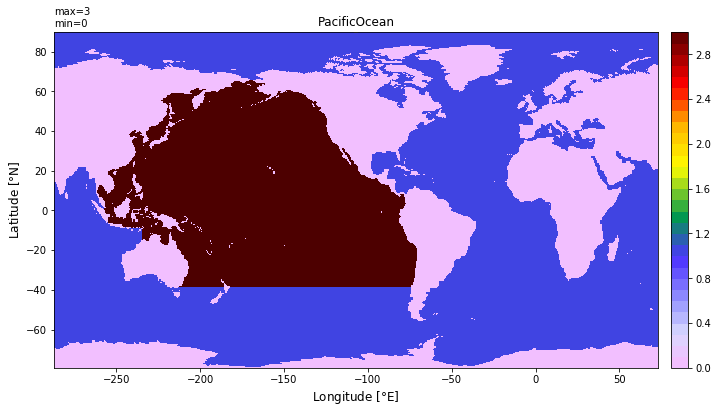

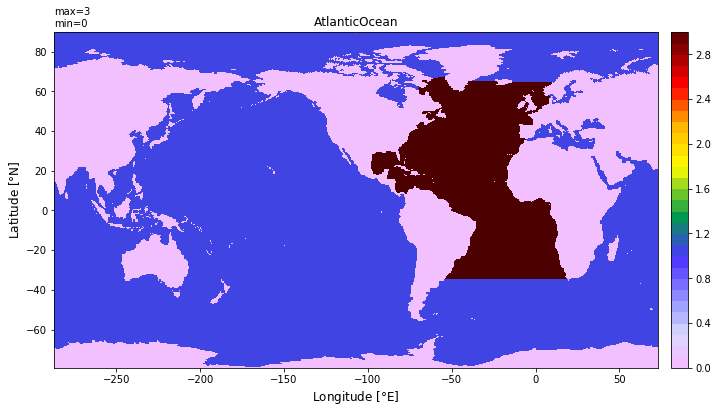

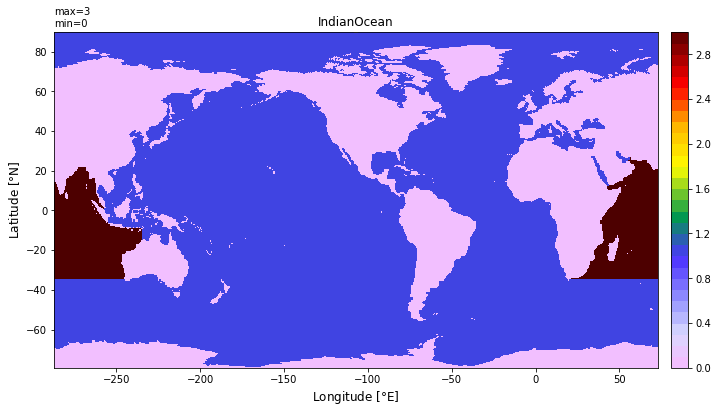

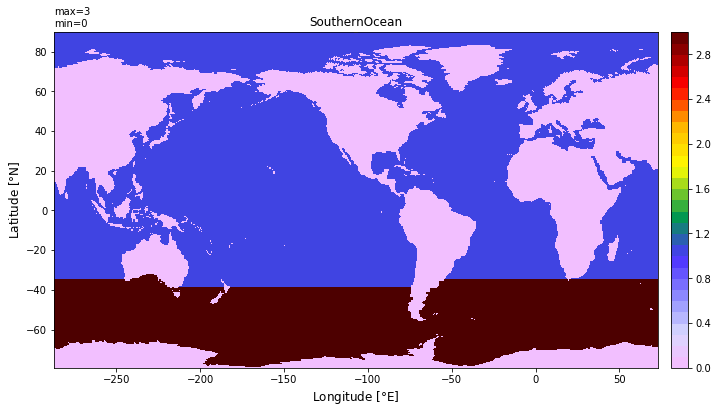

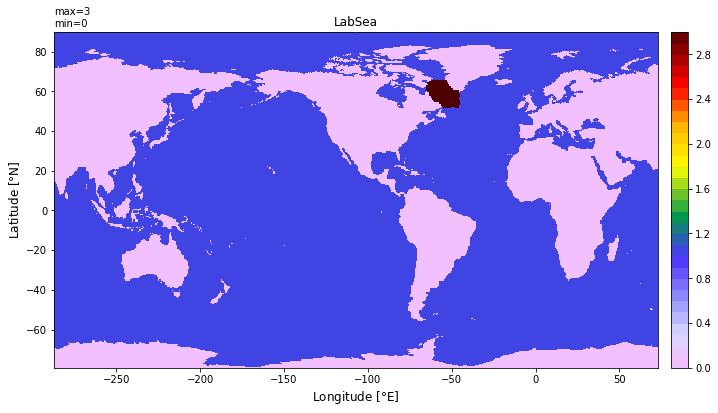

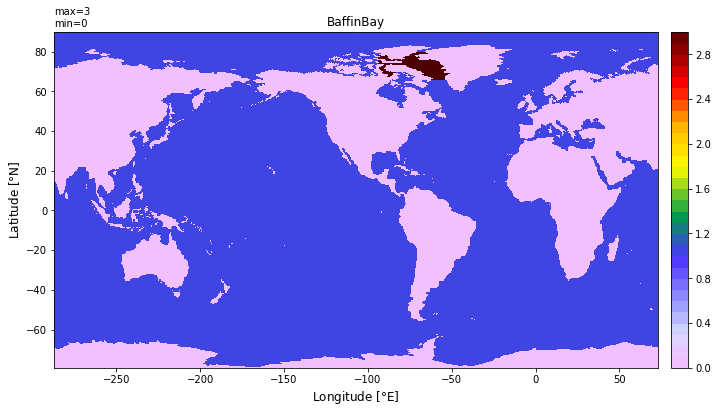

In [10]:
for r in range(len(basin_code.region)):
    #plt.figure(figsize=(12,8))
    xyplot((basin_code[0,:]+basin_code[r,:]*2).values, grd.geolon, grd.geolat,
          title=str(basin_code['region'][r].values))